In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data = {'A':['1','2'],'B':{'A':['1','2'],'C':'4'}}

In [4]:
data[0][0]

KeyError: 0

In [ ]:
df.columns

In [5]:
de = df[['Pclass','Parch']].groupby('Survived').mean()
de

KeyError: 'Survived'

In [6]:
df.columns.levels[0]

AttributeError: 'Index' object has no attribute 'levels'

In [7]:
df_Pclass

NameError: name 'df_Pclass' is not defined

In [8]:
df['Pclass'][1]

1

In [9]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [10]:
df['title'] = df.Name.str.extract('([a-zA-z]+\.)' , expand = True)
df['title'].unique().sum()

'Mr.Mrs.Miss.Master.Don.Rev.Dr.Mme.Ms.Major.Lady.Sir.Mlle.Col.Capt.Countess.Jonkheer.'

In [11]:
pd.crosstab(df['title'],df['Sex'])

Sex,female,male
title,,
Capt.,0,1
Col.,0,2
Countess.,1,0
Don.,0,1
Dr.,1,6
Jonkheer.,0,1
Lady.,1,0
Major.,0,2
Master.,0,40


In [12]:
df['title'] = df['title'].replace(['Capt.','Col.','Countess.','Don.','Dr.','Jonkheer.','Lady.','Major.','Rev.','Sir.',],'Rare')
df['title'] = df['title'].replace('mme','Mrs.')
df['title'] = df['title'].replace('Mlle.','Miss.')
df['title'] = df['title'].replace('Ms.','Miss.')
df['title'] = df['title'].map({'Master.':1,'Miss':2,'Mr.':3,'Mrs.':4,'Rare':5})
df['title'] = df['title'].fillna(0)

In [13]:
df.drop('Name',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,4.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,4.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,3.0


In [14]:
df.Age.isnull().sum()

177

In [15]:
df.drop('Ticket',axis=1,inplace= True)

In [16]:
df.drop('Cabin',axis=1,inplace= True)

In [17]:
df['Sex'].isnull().sum()

0

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,title
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,2.475870
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.424596
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,3.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,5.000000


In [19]:
df['Sex']=df['Sex'].map({'male':1,'female':0})

In [20]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,1,22.0,1,0,7.2500,S,3.0
1,2,1,1,0,38.0,1,0,71.2833,C,4.0
2,3,1,3,0,26.0,0,0,7.9250,S,0.0
3,4,1,1,0,35.0,1,0,53.1000,S,4.0
4,5,0,3,1,35.0,0,0,8.0500,S,3.0


In [21]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [22]:
for i in range(0,2):
    for j in range(0,3):
        gussed_age = df[(df['Sex'] == i) & (df['Pclass'] == 1+j)]['Age'].dropna()
        guessed_age = gussed_age.median()
        guess_ages[i,j] = int(guessed_age/0.5 + 0.5)*0.5
        

In [23]:
df.Age.isnull().sum()

177

In [24]:
#for i in range(0,2):
   # for j in range(0,3):
       # df.loc[(df['Age'].isnull()) & (df['Sex']==i) & (df['Pclass']==1+j)]['Age'] = guess_ages[i,j]

In [25]:
# for i in range(0, 2):
#         for j in range(0, 3):
#             df.loc[ (df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1)][ 'Age'] = guess_ages[i,j]
                   

In [26]:
for i in range(0, 2):
        for j in range(0, 3):
            df.loc[ (df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]


In [27]:
df.Age.head()
df.Age.isnull().sum()

0

In [28]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title
0,1,0,3,1,22.0,1,0,7.2500,S,3.0
1,2,1,1,0,38.0,1,0,71.2833,C,4.0
2,3,1,3,0,26.0,0,0,7.9250,S,0.0
3,4,1,1,0,35.0,1,0,53.1000,S,4.0
4,5,0,3,1,35.0,0,0,8.0500,S,3.0


In [29]:
print(df[df['Pclass']==1 ]['Fare'].min())
print(df[df['Pclass']==1 ]['Fare'].mean())
print(df[df['Pclass']==1 ]['Fare'].std())
print(df[df['Pclass']==1 ]['Fare'].max())

0.0
84.15468749999992
78.38037264672884
512.3292


In [30]:
df['Ageband'] = pd.cut(df['Age'],5)

In [31]:
df['Ageband']

0      (16.336, 32.252]
1      (32.252, 48.168]
2      (16.336, 32.252]
3      (32.252, 48.168]
4      (32.252, 48.168]
             ...       
886    (16.336, 32.252]
887    (16.336, 32.252]
888    (16.336, 32.252]
889    (16.336, 32.252]
890    (16.336, 32.252]
Name: Ageband, Length: 891, dtype: category
Categories (5, interval[float64]): [(0.34, 16.336] < (16.336, 32.252] < (32.252, 48.168] < (48.168, 64.084] < (64.084, 80.0]]

In [32]:
df[['Ageband', 'Survived']].groupby(['Ageband'], as_index=False).mean().sort_values(by='Ageband', ascending=True)

,Ageband,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.336714
2,"(32.252, 48.168]",0.412844
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [33]:
df.loc[(df['Age']<=16.336), 'Age'] = 0
df.loc[(df['Age']>16.336)  & (df['Age']<=32.252), 'Age'] = 1
df.loc[(df['Age']>32.252) & (df['Age']<=48.168),'Age'] = 2
df.loc[(df['Age']>48.168) & (df['Age']<=64.084),  'Age'] = 3
df.loc[(df['Age']>64.084) & (df['Age']<=80.0),'Age'] = 4

In [34]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Ageband
0,1,0,3,1,1.0,1,0,7.2500,S,3.0,"(16.336, 32.252]"
1,2,1,1,0,2.0,1,0,71.2833,C,4.0,"(32.252, 48.168]"
2,3,1,3,0,1.0,0,0,7.9250,S,0.0,"(16.336, 32.252]"
3,4,1,1,0,2.0,1,0,53.1000,S,4.0,"(32.252, 48.168]"
4,5,0,3,1,2.0,0,0,8.0500,S,3.0,"(32.252, 48.168]"


In [35]:
df.drop('PassengerId',axis=1,inplace = True)

In [36]:
df.loc[(df['Fare']<60) & (df['Pclass']==1), 'Fare'] = df['Fare']+100

In [37]:
df.drop('Ageband',axis=1,inplace = True)

In [38]:
df['Familysize'] = df['SibSp'] + df['Parch'] + 1

In [39]:
df[['Familysize', 'Survived']].groupby(['Familysize'], as_index=False).mean().sort_values(by='Familysize', ascending=True)

,Familysize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [40]:
df['Isalone'] = 0
df.loc[(df['Familysize'] == 1),'Isalone'] = 1

In [41]:
df.drop(['Familysize','SibSp','Parch'],axis=1,inplace = True)

In [42]:
df[['Isalone', 'Survived']].groupby(['Isalone'], as_index=False).mean().sort_values(by='Isalone', ascending=True)

,Isalone,Survived
0,0,0.505650
1,1,0.303538


In [43]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,title,Isalone
0,0,3,1,1.0,7.2500,S,3.0,0
1,1,1,0,2.0,71.2833,C,4.0,0
2,1,3,0,1.0,7.9250,S,0.0,1
3,1,1,0,2.0,153.1000,S,4.0,0
4,0,3,1,2.0,8.0500,S,3.0,1


In [44]:
df['fareband']=pd.cut(df['Fare'],4)

In [45]:
df[['fareband','Survived']].groupby(df['fareband']).mean()

,Survived
fareband,
"(-0.512, 128.082]",0.350384
"(128.082, 256.165]",0.610000
"(256.165, 384.247]",0.666667
"(384.247, 512.329]",1.000000


In [46]:
# df.loc[(df['Fare']<=128.082),'Fare'] = 0
# df.loc[(df['Fare']>128.082) & (df['Fare']<=256.165),'Fare'] = 1
# df.loc[(df['Fare']>256.165) & (df['Fare']<= 384.247),'Fare'] = 1
# df.loc[(df['Fare']> 384.247) ,'Fare'] = 2

In [47]:
df.loc[(df['Pclass']==1),'Fare'] = 870



In [48]:
df.loc[(df['Pclass']==2),'Fare'] = 30
df.loc[(df['Pclass']==3),'Fare'] =8

In [49]:
df.head(20)

,Survived,Pclass,Sex,Age,Fare,Embarked,title,Isalone,fareband
0,0,3,1,1.0,8.0,S,3.0,0,"(-0.512, 128.082]"
1,1,1,0,2.0,870.0,C,4.0,0,"(-0.512, 128.082]"
2,1,3,0,1.0,8.0,S,0.0,1,"(-0.512, 128.082]"
3,1,1,0,2.0,870.0,S,4.0,0,"(128.082, 256.165]"
4,0,3,1,2.0,8.0,S,3.0,1,"(-0.512, 128.082]"
5,0,3,1,1.0,8.0,Q,3.0,1,"(-0.512, 128.082]"
6,0,1,1,3.0,870.0,S,3.0,1,"(128.082, 256.165]"
7,0,3,1,0.0,8.0,S,1.0,0,"(-0.512, 128.082]"
8,1,3,0,1.0,8.0,S,4.0,0,"(-0.512, 128.082]"
9,1,2,0,0.0,30.0,C,4.0,0,"(-0.512, 128.082]"


In [50]:
df.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [51]:
df.Fare.head()

0      8.0
1    870.0
2      8.0
3    870.0
4      8.0
Name: Fare, dtype: float64

In [52]:
df[['Fare','Pclass','Survived']].groupby(df['Fare']).mean()

,Fare,Pclass,Survived
Fare,,,
8.0,8.0,3.0,0.242363
30.0,30.0,2.0,0.472826
870.0,870.0,1.0,0.629630


In [53]:
df.drop('fareband',inplace= True,axis=1)

In [54]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,title,Isalone
0,0,3,1,1.0,8.0,S,3.0,0
1,1,1,0,2.0,870.0,C,4.0,0
2,1,3,0,1.0,8.0,S,0.0,1
3,1,1,0,2.0,870.0,S,4.0,0
4,0,3,1,2.0,8.0,S,3.0,1


In [55]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [56]:
df[df.Embarked.isnull()]

,Survived,Pclass,Sex,Age,Fare,Embarked,title,Isalone
61,1,1,0,2.0,870.0,NaN,0.0,1
829,1,1,0,3.0,870.0,NaN,4.0,1


In [57]:
freq_port = df['Embarked'].dropna().mode()[0]
df['Embarked'] = df['Embarked'].fillna(freq_port, inplace=False)

In [58]:
df.Embarked.isnull().sum()

0

In [59]:
freq_port

'S'

In [60]:
df[['Embarked','Survived']].groupby(df['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


In [61]:
df['Embarked'] = df.Embarked.map({'C':2,'S':0,'Q':1}).astype(int)

In [62]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,title,Isalone
0,0,3,1,1.0,8.0,0,3.0,0
1,1,1,0,2.0,870.0,2,4.0,0
2,1,3,0,1.0,8.0,0,0.0,1
3,1,1,0,2.0,870.0,0,4.0,0
4,0,3,1,2.0,8.0,0,3.0,1


In [63]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
title       0
Isalone     0
dtype: int64

In [64]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection  import cross_val_score
from sklearn import tree


from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [259]:
model1 = LogisticRegression()
model2 = GaussianNB()
model3 = tree.DecisionTreeClassifier()

x = df.iloc[:,1:9]

In [260]:
y= df['Survived']

In [261]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [262]:
model1.fit(x_train,y_train)

C:\Users\divit\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [263]:
model2.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [264]:
model3.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [265]:
model1 = cross_val_score(GaussianNB(),x_train,y_train)
model1 

array([0.824     , 0.72      , 0.688     , 0.73387097, 0.75806452])

In [266]:
model2 = cross_val_score(LinearRegression(),x_train,y_train)
model2 

array([0.395385  , 0.34108094, 0.37292964, 0.32737521, 0.31359197])

In [267]:
model_3 = cross_val_score(tree.DecisionTreeClassifier(),x_train,y_train)
model_3 

array([0.816     , 0.8       , 0.84      , 0.75      , 0.76612903])

In [268]:
pred = model3.predict(x_test)
pred.shape

(268,)

In [269]:
accu = accuracy_score(y_test,pred)
accu

0.7985074626865671

In [270]:
test = pd.read_csv('newone.csv')
test.head()
c = test
test.shape
test.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
title       0
Isalone     0
dtype: int64

In [271]:
pred1 = model3.predict(c)
pred1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [272]:
d = pd.DataFrame(pred1)

In [273]:
d1 = pd.read_csv('sample_submission.csv')
d1.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [274]:
dataset  = pd.concat([d1,d],axis=1)

In [275]:
dataset.columns = ['PassengerId','Survived']

In [276]:
dataset.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [277]:
dataset.to_csv('sample_submission7.csv',index = False)

In [278]:
df.head(20)

,Survived,Pclass,Sex,Age,Fare,Embarked,title,Isalone
0,0,3,1,1.0,8.0,0,3.0,0
1,1,1,0,2.0,870.0,2,4.0,0
2,1,3,0,1.0,8.0,0,0.0,1
3,1,1,0,2.0,870.0,0,4.0,0
4,0,3,1,2.0,8.0,0,3.0,1
5,0,3,1,1.0,8.0,1,3.0,1
6,0,1,1,3.0,870.0,0,3.0,1
7,0,3,1,0.0,8.0,0,1.0,0
8,1,3,0,1.0,8.0,0,4.0,0
9,1,2,0,0.0,30.0,2,4.0,0


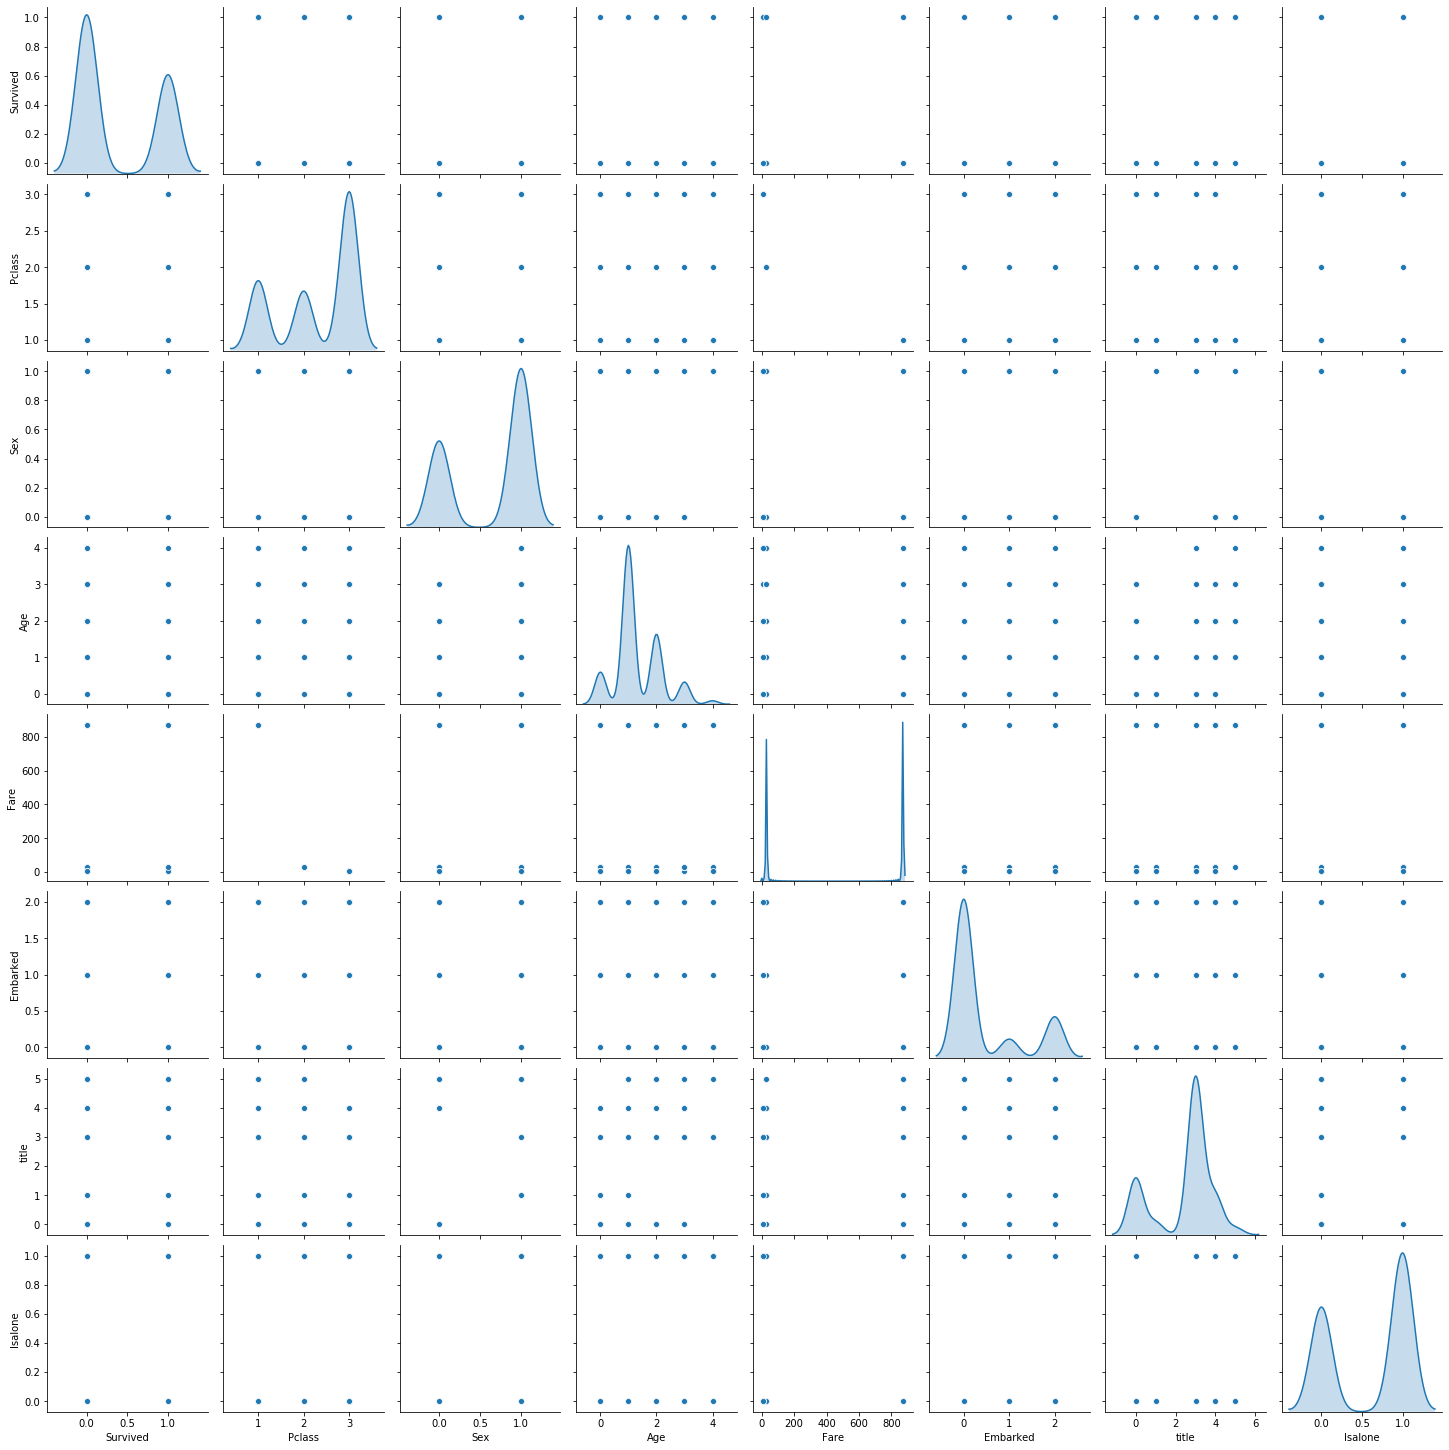

In [66]:
sns.pairplot(df,diag_kind='kde')